In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from global_values import *
from tqdm import tqdm

global_values.GRAD_SCORING = True
global_values.NN_SCORING = False


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
global_values.MODEL = SiameseCNN()
global_values.MODEL.load_state_dict(torch.load("siamese_weights.pth", map_location=device))
global_values.MODEL.to(device)
global_values.MODEL.eval()
global_values.DEVICE = device
ROTATING_PIECES = True


# Histograme pe toate imaginile

## Scor 5 imagini

In [8]:
clasic_correct_scores = []
clasic_incorrect_scores = []

buddy_correct_scores = []
buddy_incorrect_scores = []

prudent_correct_scores = []
prudent_incorrect_scores = []
files = os.listdir("disney_puzzle")
for f in files:

    image_path = os.path.join("disney_puzzle",f)
    output_folder = "fragments"

    global_values.COL_NR = 16
    global_values.ROW_NR = 16
    solution_path = f"solution/valid_comparisons_{global_values.COL_NR}_{global_values.ROW_NR}_{f}.txt"

    fragments, tile_h, tile_w = divide_image(image_path, output_folder,solution_path, global_values.COL_NR, global_values.ROW_NR)
    global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

    fragment_rotation_dictionary = None
    if global_values.NN_SCORING == True:
        fragment_rotation_dictionary = create_fragment_rotation_dictionary(fragments)
    sides_comparisons = create_sides_comparisons(fragments,fragment_rotation_dictionary)
    sides_comparisons = calculate_buddy_score(fragments,sides_comparisons)

    gt_comparisons = read_valid_comparisons(solution_path)



    for s_comp in sides_comparisons:
        is_correct = False
        for gt_comp in gt_comparisons:
            if s_comp.side1.side_idx == gt_comp[2] and s_comp.side2.side_idx == gt_comp[3] and s_comp.side1.fragment_idx == gt_comp[0] and s_comp.side2.fragment_idx == gt_comp[1]:
                clasic_correct_scores.append(s_comp.score)
                buddy_correct_scores.append(s_comp.buddy_score)
                prudent_correct_scores.append(s_comp.prudent_score)
                is_correct = True
            elif s_comp.side1.side_idx == gt_comp[3] and s_comp.side2.side_idx == gt_comp[2] and s_comp.side1.fragment_idx == gt_comp[1] and s_comp.side2.fragment_idx == gt_comp[0]:
                clasic_correct_scores.append(s_comp.score)
                buddy_correct_scores.append(s_comp.buddy_score)
                prudent_correct_scores.append(s_comp.prudent_score)
                is_correct = True
        if is_correct == False:
            clasic_incorrect_scores.append(s_comp.score)
            buddy_incorrect_scores.append(s_comp.buddy_score)
            prudent_incorrect_scores.append(s_comp.prudent_score)






Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0, 100)0.0, 101)0.0, 102)0.0, 103)0.0, 104)0.0, 105)0.0, 106)0.0, 107)0.0, 108)0.0, 109)0.0, 110)0.0, 111)0.0, 112)0.0, 113)0.0, 114)0.0, 115)0.0, 116)0.0, 117)0.0, 118)0.0, 119)0.0, 120)0.0

100%|██████████| 255/255 [00:38<00:00,  6.70it/s]


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0, 100)0.0, 101)0.0, 102)0.0, 103)0.0, 104)0.0, 105)0.0, 106)0.0, 107)0.0, 108)0.0, 109)0.0, 110)0.0, 111)0.0, 112)0.0, 113)0.0, 114)0.0, 115)0.0, 116)0.0, 117)0.0, 118)0.0, 119)0.0, 120)0.0

100%|██████████| 255/255 [00:37<00:00,  6.86it/s]


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0, 100)0.0, 101)0.0, 102)0.0, 103)0.0, 104)0.0, 105)0.0, 106)0.0, 107)0.0, 108)0.0, 109)0.0, 110)0.0, 111)0.0, 112)0.0, 113)0.0, 114)0.0, 115)0.0, 116)0.0, 117)0.0, 118)0.0, 119)0.0, 120)0.0

100%|██████████| 255/255 [00:31<00:00,  8.06it/s]


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0, 100)0.0, 101)0.0, 102)0.0, 103)0.0, 104)0.0, 105)0.0, 106)0.0, 107)0.0, 108)0.0, 109)0.0, 110)0.0, 111)0.0, 112)0.0, 113)0.0, 114)0.0, 115)0.0, 116)0.0, 117)0.0, 118)0.0, 119)0.0, 120)0.0

100%|██████████| 255/255 [00:32<00:00,  7.77it/s]


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0, 100)0.0, 101)0.0, 102)0.0, 103)0.0, 104)0.0, 105)0.0, 106)0.0, 107)0.0, 108)0.0, 109)0.0, 110)0.0, 111)0.0, 112)0.0, 113)0.0, 114)0.0, 115)0.0, 116)0.0, 117)0.0, 118)0.0, 119)0.0, 120)0.0

100%|██████████| 255/255 [00:34<00:00,  7.33it/s]


## Score zoom

In [9]:
clasic_x_buddy_correct = []
for i in range(len(clasic_correct_scores)):
    clasic_x_buddy_correct.append(clasic_correct_scores[i]*buddy_correct_scores[i])
clasic_x_buddy_incorrect = []
for i in range(len(clasic_correct_scores)):
    clasic_x_buddy_incorrect.append(clasic_incorrect_scores[i]*buddy_incorrect_scores[i])


prudent_x_buddy_correct = []
for i in range(len(prudent_correct_scores)):
    prudent_x_buddy_correct.append(prudent_correct_scores[i]*buddy_correct_scores[i])
prudent_x_buddy_incorrect = []
for i in range(len(prudent_correct_scores)):
    prudent_x_buddy_incorrect.append(prudent_incorrect_scores[i]*buddy_incorrect_scores[i])





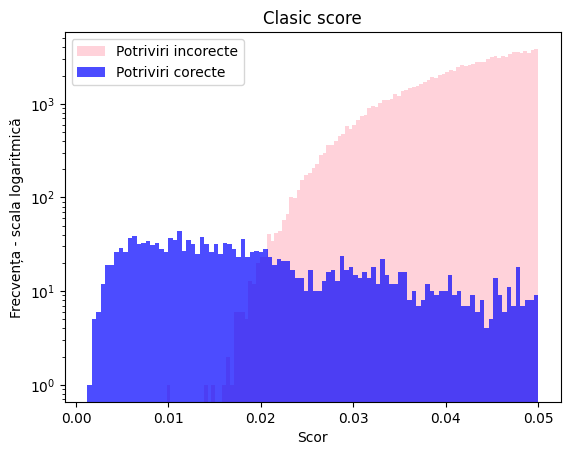

0.2765727327237463


In [67]:
zoom_correct = []
zoom_incorrect = []

for i in clasic_correct_scores:
    if i < 0.05:
        zoom_correct.append(i)
for i in clasic_incorrect_scores:
    if i < 0.05:
        zoom_incorrect.append(i)

plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.title('Clasic score')
plt.xlabel("Scor")
plt.yscale("log")
plt.ylabel("Frecvența - scala logaritmică")
plt.legend()
plt.show()

print(max(clasic_correct_scores))

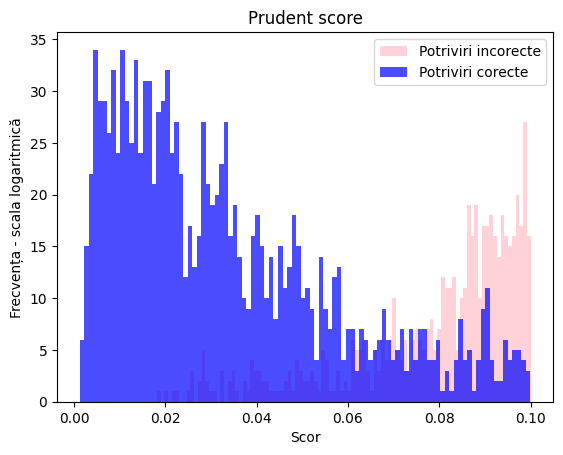

6.328460462350783e+22


In [59]:
zoom_correct = []
zoom_incorrect = []

for i in prudent_correct_scores:
    if i < 0.1:
        zoom_correct.append(i)
for i in prudent_incorrect_scores:
    if i < 0.1:
        zoom_incorrect.append(i)

plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.title('Prudent score')
plt.xlabel("Scor")
# plt.yscale("log")
plt.ylabel("Frecvența - scala logaritmică")
plt.legend()
plt.show()

print(max(prudent_correct_scores))

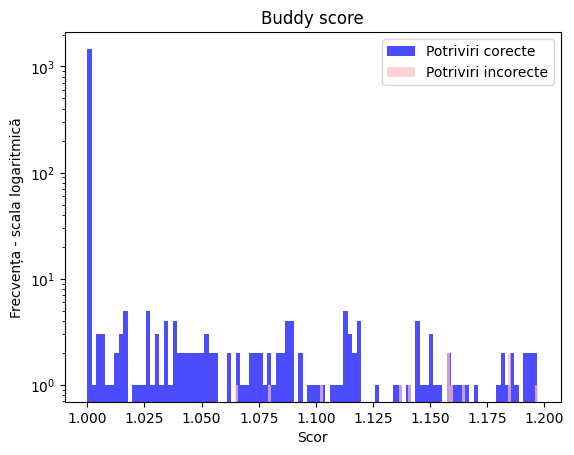

16.4170988761253


In [57]:
zoom_correct = []
zoom_incorrect = []

for i in buddy_correct_scores:
    if i < 1.2:
        zoom_correct.append(i)
for i in buddy_incorrect_scores:
    if i < 1.2:
        zoom_incorrect.append(i)
plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')

plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
plt.title('Buddy score')
plt.xlabel("Scor")
plt.yscale("log")
plt.ylabel("Frecvența - scala logaritmică")
plt.legend()
plt.show()

print(max(buddy_correct_scores))

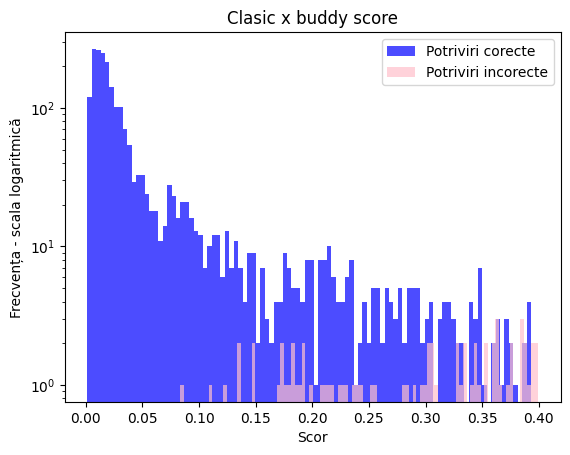

4.04309470806459


In [42]:
zoom_correct = []
zoom_incorrect = []

for i in clasic_x_buddy_correct:
    if i < 0.4:
        zoom_correct.append(i)
for i in clasic_x_buddy_incorrect:
    if i < 0.4:
        zoom_incorrect.append(i)

plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
plt.title('Clasic x buddy score')
plt.xlabel("Scor")
plt.yscale("log")
plt.ylabel("Frecvența - scala logaritmică")
plt.legend()
plt.show()

print(max(clasic_x_buddy_correct))

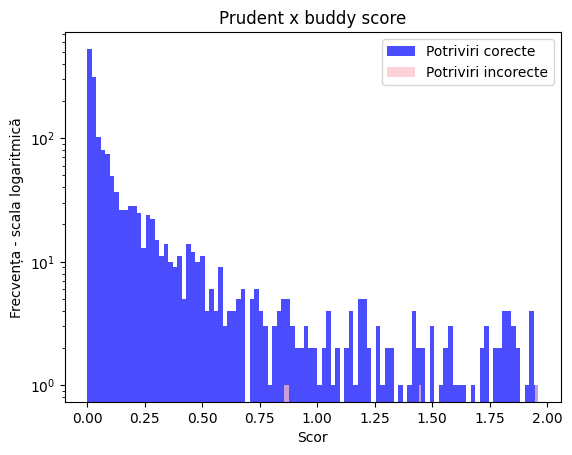

3.530311148509897e+23


In [76]:
zoom_correct = []
zoom_incorrect = []

for i in prudent_x_buddy_correct:
    if i < 2:
        zoom_correct.append(i)
for i in prudent_x_buddy_incorrect:
    if i < 2:
        zoom_incorrect.append(i)
plt.hist(zoom_correct, bins=100, alpha=0.7, color='blue', label = 'Potriviri corecte')
plt.hist(zoom_incorrect, bins=100, alpha=0.7, color='pink', label='Potriviri incorecte')
plt.title('Prudent x buddy score')
plt.xlabel("Scor")
plt.yscale("log")
plt.ylabel("Frecvența - scala logaritmică")
plt.legend()
plt.show()

print(max(prudent_x_buddy_correct))

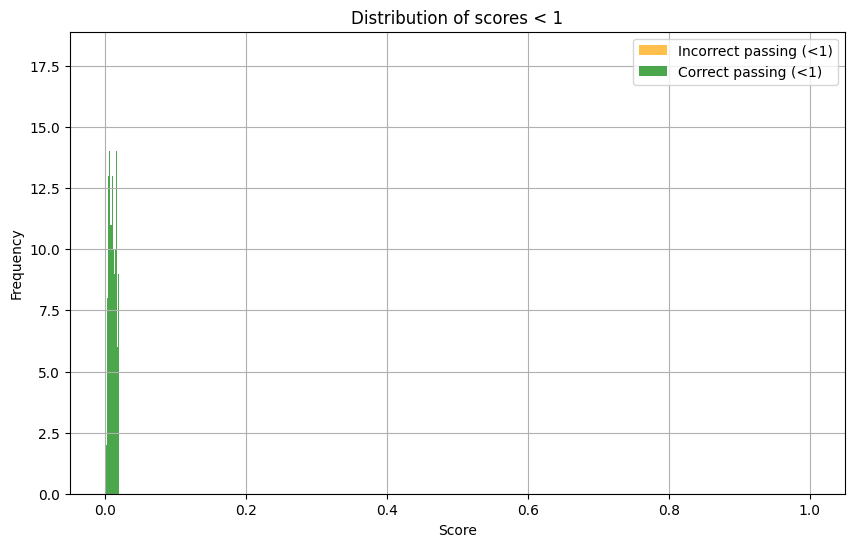

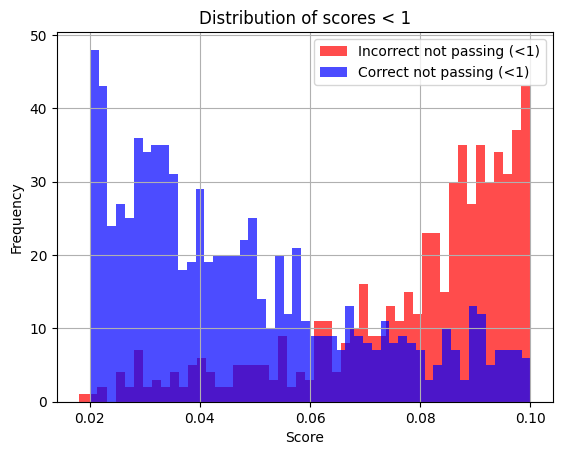

3.530311148509897e+23
0.0


In [ ]:
correct_passing = []
correct_not_passing = []

incorrect_passing = []
incorrect_not_passing = []

zoom_incorrect = []

for i in range(len(buddy_correct_scores)):
    if buddy_correct_scores[i] < 1.025 and prudent_correct_scores[i] < 0.02:
        correct_passing.append(prudent_correct_scores[i])
    else:
        correct_not_passing.append(prudent_correct_scores[i])

for i in range(len(buddy_incorrect_scores)):
    if buddy_incorrect_scores[i] < 1.025 and prudent_incorrect_scores[i] < 0.02:
        incorrect_passing.append(prudent_incorrect_scores[i])
    else:
        incorrect_not_passing.append(prudent_incorrect_scores[i])

import matplotlib.pyplot as plt

# Prepare data < 1 for each list
correct_passing_lt1 = [x for x in correct_passing if x < 0.1]
correct_not_passing_lt1 = [x for x in correct_not_passing if x < 0.1]
incorrect_passing_lt1 = [x for x in incorrect_passing if x < 0.1]
incorrect_not_passing_lt1 = [x for x in incorrect_not_passing if x < 0.1]

# Plot
plt.figure(figsize=(10, 6))

plt.hist(incorrect_passing_lt1, bins=50, alpha=0.7, color='orange', label='Incorrect passing (<1)')

plt.hist(correct_passing_lt1, bins=50, alpha=0.7, color='green', label='Correct passing (<1)')

plt.title('Distribution of scores < 1')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.hist(incorrect_not_passing_lt1, bins=50, alpha=0.7, color='red', label='Incorrect not passing (<1)')
plt.hist(correct_not_passing_lt1, bins=50, alpha=0.7, color='blue', label='Correct not passing (<1)')

plt.title('Distribution of scores < 1')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


print(max(prudent_x_buddy_correct))
print(len(incorrect_passing)/5)

In [4]:
is_match = []
is_not_match = []

files = os.listdir("disney_puzzle")
image_path = os.path.join("disney_puzzle","aladin.jpg")
output_folder = "fragments"

global_values.COL_NR = 10
global_values.ROW_NR = 10
solution_path = f"solution/valid_comparisons_{global_values.COL_NR}_{global_values.ROW_NR}_aladin.jpg.txt"

fragments, tile_h, tile_w = divide_image(image_path, output_folder,solution_path, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

fragment_rotation_dictionary = None
if global_values.NN_SCORING == True:
    fragment_rotation_dictionary = create_fragment_rotation_dictionary(fragments)
sides_comparisons = create_sides_comparisons(fragments,fragment_rotation_dictionary)


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0, 36)0.0, 37)0.0, 38)0.0, 39)0.0, 40)0.0, 41)0.0, 42)0.0, 43)0.0, 44)0.0, 45)0.0, 46)0.0, 47)0.0, 48)0.0, 49)0.0, 50)0.0, 51)0.0, 52)0.0, 53)0.0, 54)0.0, 55)0.0, 56)0.0, 57)0.0, 58)0.0, 59)0.0, 60)0.0, 61)0.0, 62)0.0, 63)0.0, 64)0.0, 65)0.0, 66)0.0, 67)0.0, 68)0.0, 69)0.0, 70)0.0, 71)0.0, 72)0.0, 73)0.0, 74)0.0, 75)0.0, 76)0.0, 77)0.0, 78)0.0, 79)0.0, 80)0.0, 81)0.0, 82)0.0, 83)0.0, 84)0.0, 85)0.0, 86)0.0, 87)0.0, 88)0.0, 89)0.0, 90)0.0, 91)0.0, 92)0.0, 93)0.0, 94)0.0, 95)0.0, 96)0.0, 97)0.0, 98)0.0, 99)0.0


 38%|███▊      | 38/99 [00:02<00:04, 13.63it/s]


KeyboardInterrupt: 

## plot all scores for every side of every fragment

In [ ]:
# gt_comparisons = read_valid_comparisons(solution_path)
# comparisons = []

# for s in sides_comparisons:
#     comparisons.append((s.side1.fragment_idx, s.side2.fragment_idx, s.side1.side_idx, s.side2.side_idx, s.score))
#     comparisons.append((s.side2.fragment_idx, s.side1.fragment_idx, s.side2.side_idx, s.side1.side_idx, s.score))

# for fr_idx in range(len(fragments)):
#     for side_idx in range(4):
#         is_match_scores = []
#         is_not_match_scores = []
#         total_comp = 0
#         best_comp = None

#         best_score = [[None for _ in range(4)] for _ in range(len(fragments))]

#         for s_comp in comparisons:
#             if fr_idx == s_comp[0] and side_idx == s_comp[2]:
#                 total_comp += 1
#                 was_found_correct = False
#                 for gt_comp in gt_comparisons:
#                     if best_score[fr_idx][side_idx] is None or s_comp[4] < best_score[fr_idx][side_idx]:
#                         best_score[fr_idx][side_idx] = s_comp[4]
#                     if  s_comp[0] == gt_comp[0] and s_comp[1] == gt_comp[1] and s_comp[2] == gt_comp[2] and s_comp[3] == gt_comp[3]:
#                         is_match_scores.append(s_comp[4])
#                         print("MATCH FOUND: pred", s_comp)
#                         was_found_correct = True
#                         break
#                 if was_found_correct == False:
#                     is_not_match_scores.append(s_comp[4])
#         print(f"Best comp score: {best_score[fr_idx][side_idx]}")
#         # Clean scores before plotting
#         print(f"Total comparisons for fr {fr_idx} side {side_idx} = {total_comp}")

#         combined_scores = np.concatenate([is_match_scores, is_not_match_scores])
#         low, high = np.min(combined_scores), np.max(combined_scores)
#         buffer = (high - low) * 0.05
#         low -= buffer
#         high += buffer
#         plt.hist(is_not_match_scores, bins=50, alpha=0.7, color='pink', label="Not Match", range=(low, high))
#         plt.hist(is_match_scores, bins=50, alpha=0.7, color='blue', label="Match", range=(low, high))

#         # Overlay X markers for match scores
#         for score in is_match_scores:
#             plt.scatter(score, 1, color='blue', marker='x', s=80)

#         plt.legend()
#         plt.title(f"Fragment {fr_idx} — Side {side_idx}")
#         plt.xlabel("Score")
#         plt.ylabel("Frequency")
#         plt.grid(True)
#         plt.show()




In [ ]:


is_match = []
is_not_match = []

files = os.listdir("disney_puzzle")
image_path = os.path.join("disney_puzzle","aladin.jpg")
output_folder = "fragments"

global_values.COL_NR = 6
global_values.ROW_NR = 6
solution_path = f"solution/valid_comparisons_{global_values.COL_NR}_{global_values.ROW_NR}_aladin.jpg.txt"

fragments, tile_h, tile_w = divide_image(image_path, output_folder,solution_path, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

fragment_rotation_dictionary = None
if global_values.NN_SCORING == True:
    fragment_rotation_dictionary = create_fragment_rotation_dictionary(fragments)
sides_comparisons = create_sides_comparisons(fragments,fragment_rotation_dictionary)


Rotations by fragment: 0)0.0, 1)0.0, 2)0.0, 3)0.0, 4)0.0, 5)0.0, 6)0.0, 7)0.0, 8)0.0, 9)0.0, 10)0.0, 11)0.0, 12)0.0, 13)0.0, 14)0.0, 15)0.0, 16)0.0, 17)0.0, 18)0.0, 19)0.0, 20)0.0, 21)0.0, 22)0.0, 23)0.0, 24)0.0, 25)0.0, 26)0.0, 27)0.0, 28)0.0, 29)0.0, 30)0.0, 31)0.0, 32)0.0, 33)0.0, 34)0.0, 35)0.0


100%|██████████| 35/35 [00:00<00:00, 47.60it/s]


In [ ]:
## best score for all sides of all fragments

best_score = [[None for _ in range(4)] for _ in range(len(fragments))]
for s in sides_comparisons:
    if best_score[s.side1.fragment_idx][s.side1.side_idx] is None or s.score < best_score[s.side1.fragment_idx][s.side1.side_idx]:
        best_score[s.side1.fragment_idx][s.side1.side_idx] = s.score

    if best_score[s.side2.fragment_idx][s.side2.side_idx] is None or s.score < best_score[s.side2.fragment_idx][s.side2.side_idx]:
        best_score[s.side2.fragment_idx][s.side2.side_idx] = s.score

### calculate_buddy_score
for s in sides_comparisons:
    s.buddy_score = s.score/best_score[s.side1.fragment_idx][s.side1.side_idx] + s.score/best_score[s.side2.fragment_idx][s.side2.side_idx]


print(best_score)

[[0.029240041529372093, 0.02242860401676152, 0.016823519022524828, 0.025219097082806178], [0.02513645656156936, 0.024055721823090088, 0.02170026349741114, 0.023227278526293953], [0.024212561378824868, 0.01635170371600984, 0.01422201978654442, 0.02327406314950314], [0.026108689377233926, 0.019658813566973292, 0.006226641574370987, 0.01635170371600984], [0.027942143318293353, 0.01823340809524967, 0.023657978853621406, 0.019658813566973292], [0.026030957556703815, 0.027634164793665608, 0.02060038851083605, 0.01823340809524967], [0.016823519022524828, 0.018397298110531403, 0.025531997393098763, 0.02220189749135376], [0.02170026349741114, 0.0020900091589814264, 0.0043985702052775615, 0.018397298110531403], [0.01422201978654442, 0.004507319226729215, 0.003464617366360737, 0.0020900091589814264], [0.006226641574370987, 0.01039791628294365, 0.00404904935807733, 0.004507319226729215], [0.022653079821347486, 0.01702018607645371, 0.017448933403795212, 0.01039791628294365], [0.021563971176282552, 

Fragment 0 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (0, 31, 0, 2, 0.029240041529372093)
Min buddy score = 2.5696769927299306


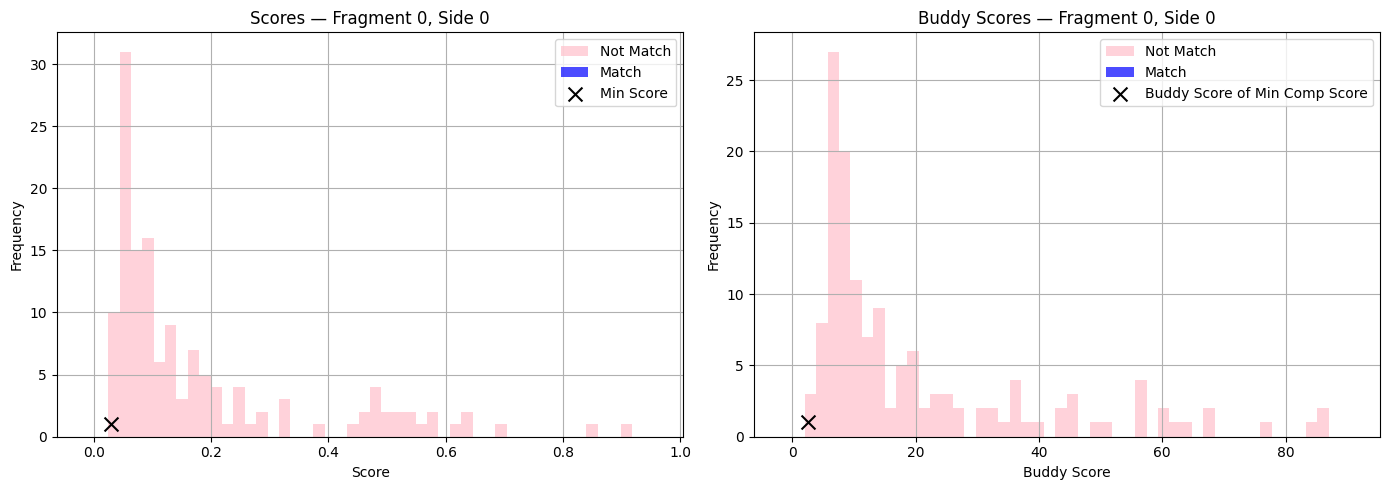

Fragment 0 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (0, 15, 1, 1, 0.02242860401676152)
Min buddy score = 7.192003154685962


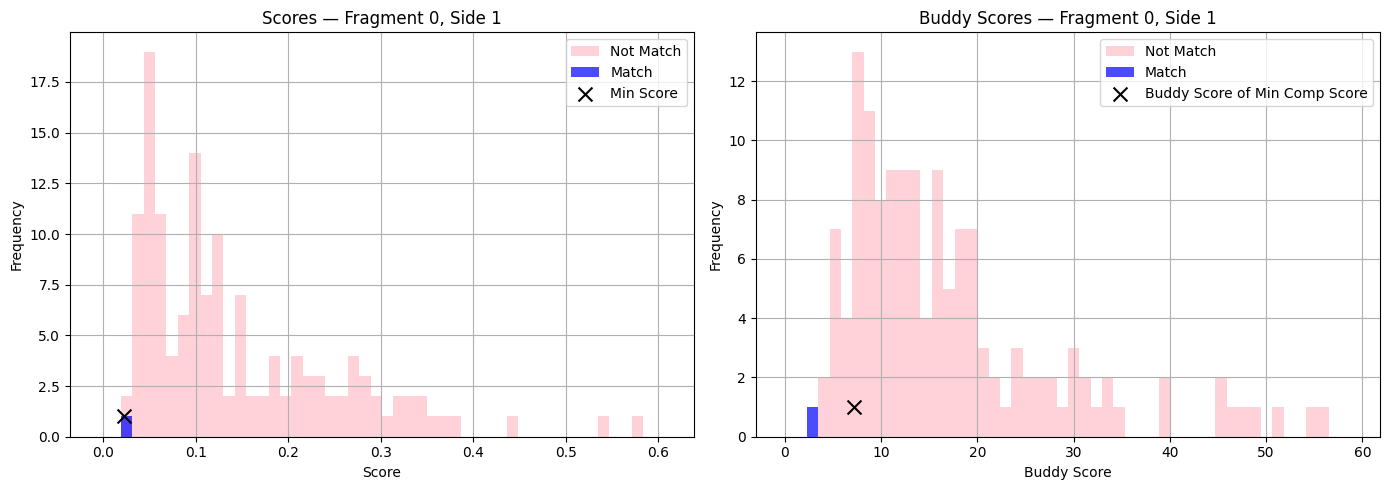

Fragment 0 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (0, 6, 2, 0, 0.016823519022524828)
Min buddy score = 2.0


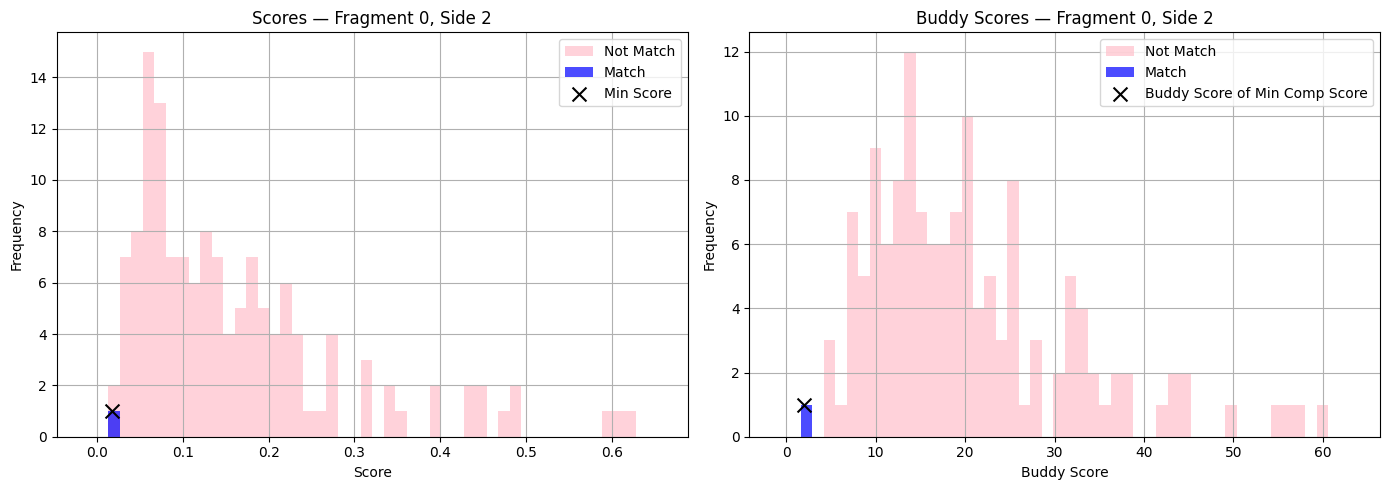

Fragment 0 side 3
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (0, 15, 3, 1, 0.025219097082806178)
Min buddy score = 7.962391800148022


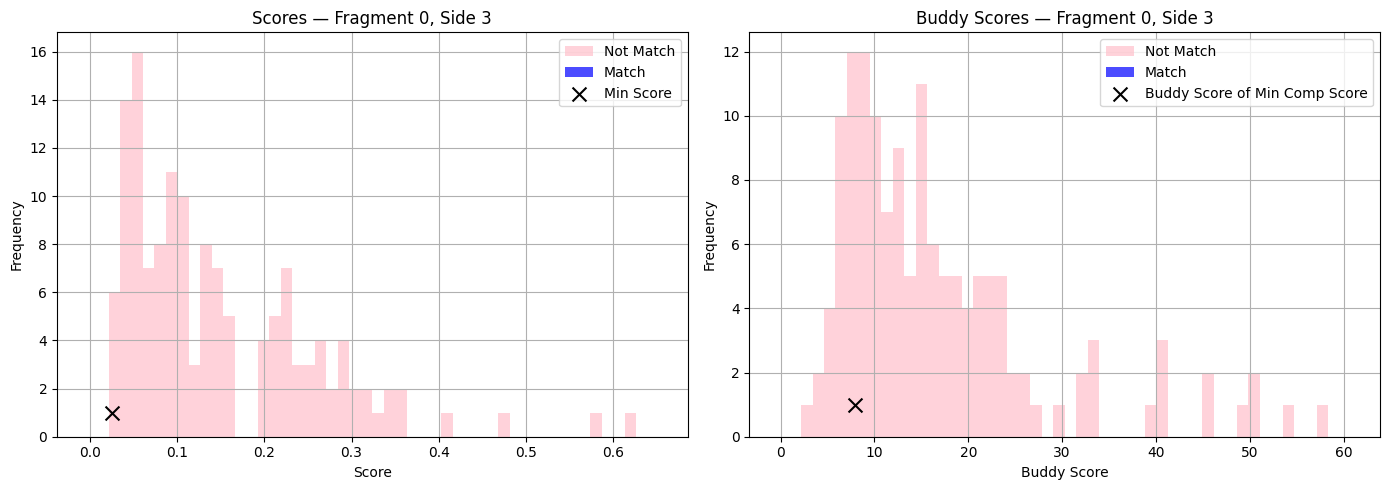

Fragment 1 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (1, 15, 0, 1, 0.02513645656156936)
Min buddy score = 7.939576721339691


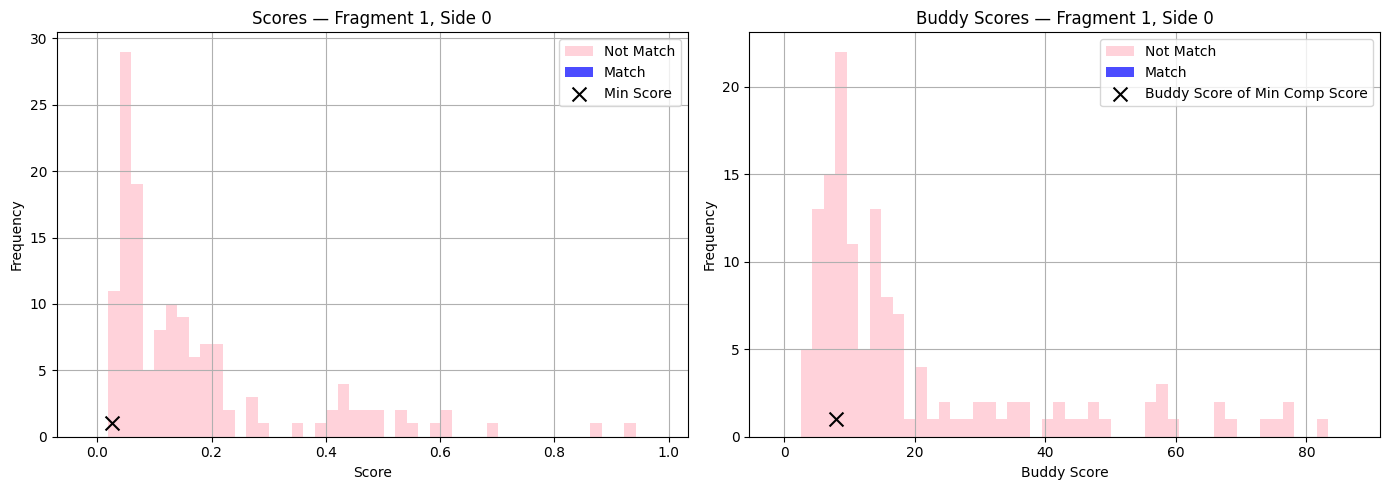

Fragment 1 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (1, 21, 1, 0, 0.024055721823090088)
Min buddy score = 3.442523956335773


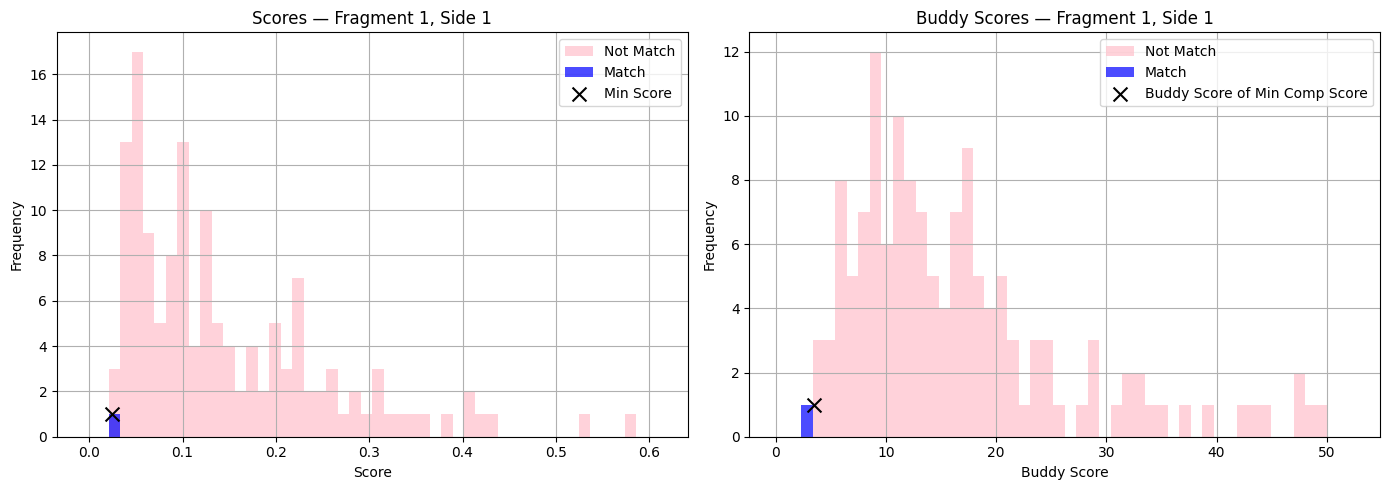

Fragment 1 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (1, 7, 2, 0, 0.02170026349741114)
Min buddy score = 2.0


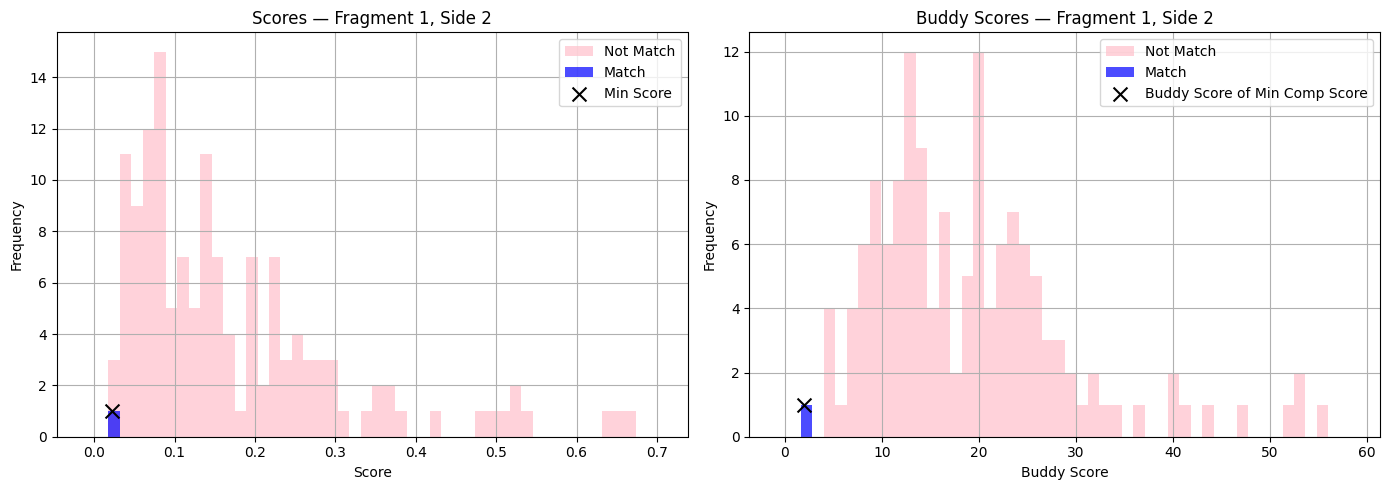

Fragment 1 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (1, 16, 3, 3, 0.023227278526293953)
Min buddy score = 7.412498156465666


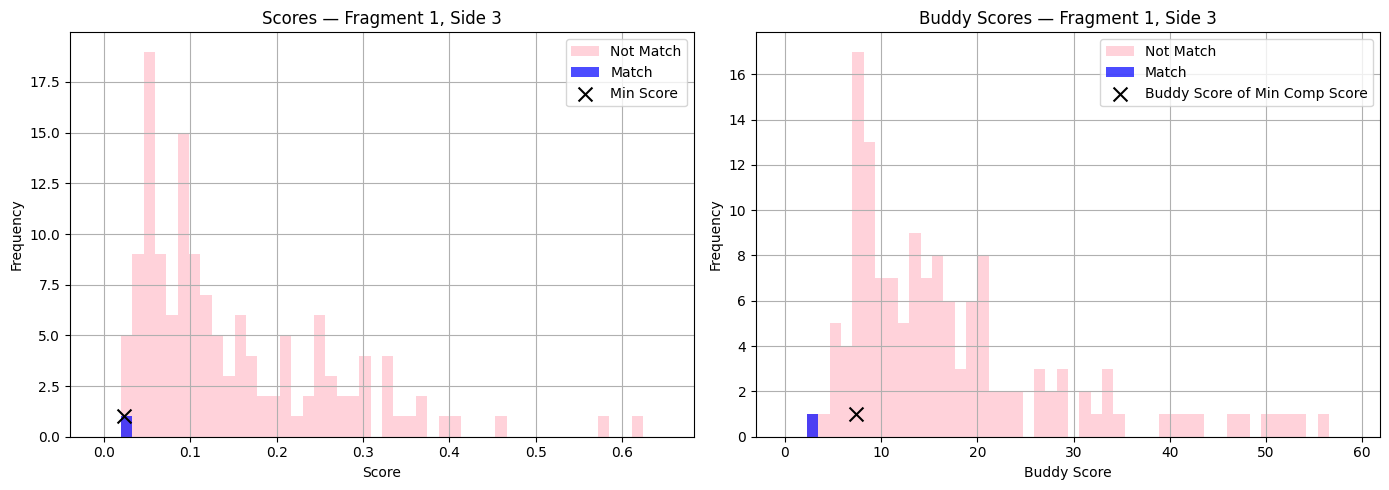

Fragment 2 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (2, 31, 0, 2, 0.024212561378824868)
Min buddy score = 2.299789553760556


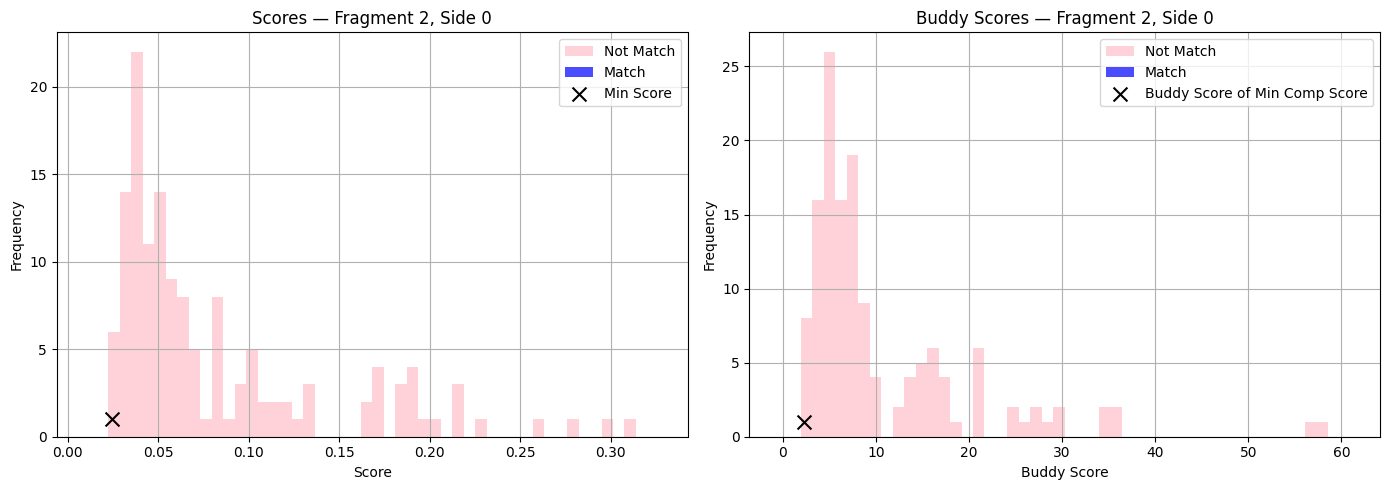

Fragment 2 side 1
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (2, 3, 1, 3, 0.01635170371600984)
Min buddy score = 2.0


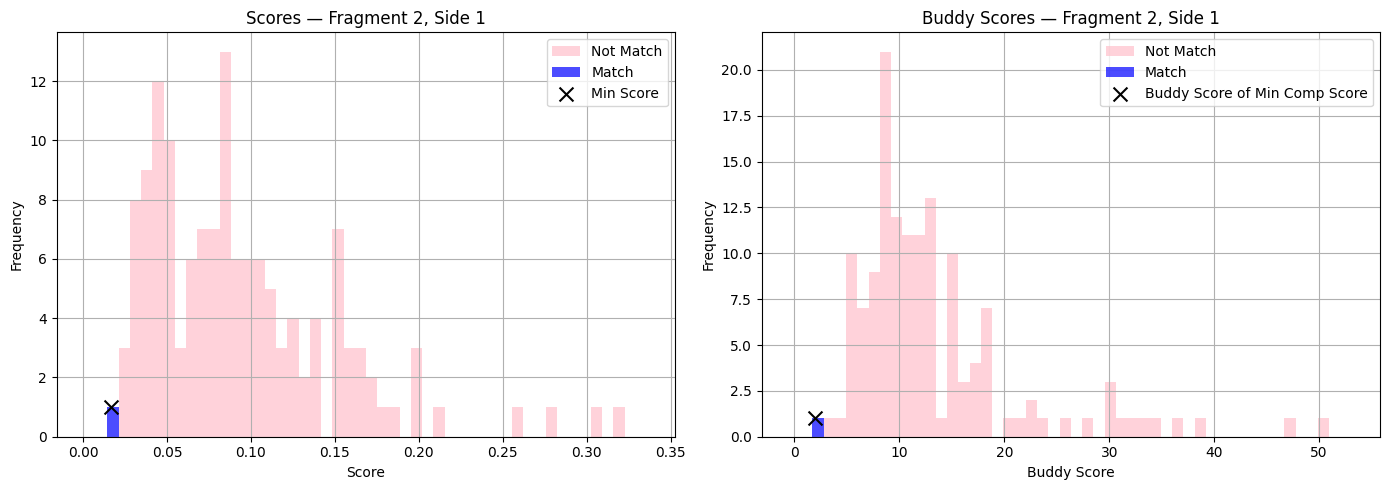

Fragment 2 side 2
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (2, 8, 2, 0, 0.01422201978654442)
Min buddy score = 2.0


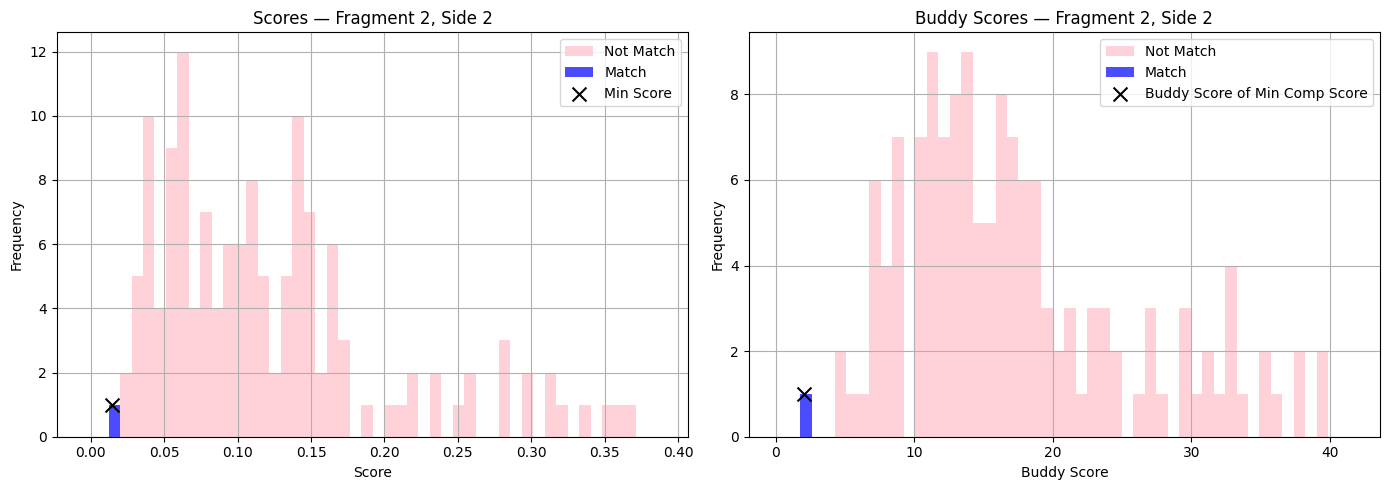

Fragment 2 side 3
Total comparisons = 140
Found 1 matches and 139 non-matches
Min score = (2, 15, 3, 1, 0.02327406314950314)
Min buddy score = 7.42541427617983


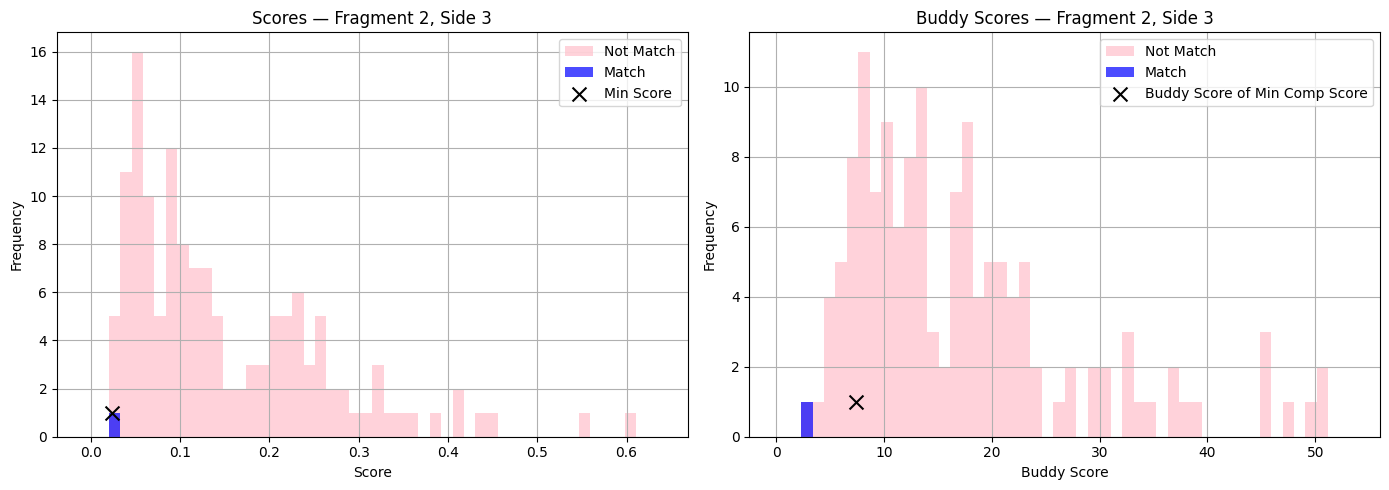

Fragment 3 side 0
Total comparisons = 140
Found 0 matches and 140 non-matches
Min score = (3, 15, 0, 1, 0.026108689377233926)
Min buddy score = 8.207987036006855


KeyboardInterrupt: 

In [ ]:
gt_comparisons = read_valid_comparisons(solution_path)

for fr_idx in range(len(fragments)):
    for side_idx in range(4):
        is_match_scores = []
        is_not_match_scores = []
        buddy_match_scores = []
        buddy_not_match_scores = []
        total_comp = 0

        min_score = float('inf')
        buddy_score_of_min = None
        min_score_info = None

        for s_comp in sides_comparisons:
            f1, f2 = s_comp.side1.fragment_idx, s_comp.side2.fragment_idx
            s1, s2 = s_comp.side1.side_idx, s_comp.side2.side_idx

            if (fr_idx == f1 and side_idx == s1) or (fr_idx == f2 and side_idx == s2):
                total_comp += 1
                score = s_comp.score
                buddy_score = s_comp.buddy_score

                if score < min_score:
                    min_score = score
                    min_score_info = (f1, f2, s1, s2, score)
                    buddy_score_of_min = buddy_score

                if (f1, f2, s1, s2) in gt_comparisons or (f2, f1, s2, s1) in gt_comparisons:
                    is_match_scores.append(score)
                    buddy_match_scores.append(buddy_score)
                else:
                    is_not_match_scores.append(score)
                    buddy_not_match_scores.append(buddy_score)

        if total_comp == 0:
            continue

        print(f"Fragment {fr_idx} side {side_idx}")
        print(f"Total comparisons = {total_comp}")
        print(f"Found {len(is_match_scores)} matches and {len(is_not_match_scores)} non-matches")
        print(f"Min score = {min_score_info}")
        print(f"Min buddy score = {buddy_score_of_min}")

        # Clean NaNs/infs
        all_scores = np.array(is_match_scores + is_not_match_scores)
        all_buddies = np.array(buddy_match_scores + buddy_not_match_scores)
        low1, high1 = np.min(all_scores), np.max(all_scores)
        low2, high2 = np.min(all_buddies), np.max(all_buddies)
        buffer1 = (high1 - low1) * 0.05
        buffer2 = (high2 - low2) * 0.05
        low1 -= buffer1
        high1 += buffer1
        low2 -= buffer2
        high2 += buffer2

        # Plot side-by-side
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Score plot
        axes[0].hist(is_not_match_scores, bins=50, alpha=0.7, color='pink', label="Not Match", range=(low1, high1))
        axes[0].hist(is_match_scores, bins=50, alpha=0.7, color='blue', label="Match", range=(low1, high1))
        axes[0].scatter(min_score, 1, color='black', marker='x', s=100, label="Min Score")
        axes[0].legend()
        axes[0].set_title(f"Scores — Fragment {fr_idx}, Side {side_idx}")
        axes[0].set_xlabel("Score")
        axes[0].set_ylabel("Frequency")
        axes[0].grid(True)
        # axes[1].set_yscale("log")    # <--- log scale Y
        # Buddy score plot
        axes[1].hist(buddy_not_match_scores, bins=50, alpha=0.7, color='pink', label="Not Match", range=(low2, high2))
        axes[1].hist(buddy_match_scores, bins=50, alpha=0.7, color='blue', label="Match", range=(low2, high2))
        axes[1].scatter(buddy_score_of_min, 1, color='black', marker='x', s=100, label="Buddy Score of Min Comp Score")
        axes[1].legend()
        axes[1].set_title(f"Buddy Scores — Fragment {fr_idx}, Side {side_idx}")
        axes[1].set_xlabel("Buddy Score")
        axes[1].set_ylabel("Frequency")
        axes[1].grid(True)
        # axes[1].set_yscale("log")    # <--- log scale Y
        plt.tight_layout()
        plt.show()
